In [156]:
import plots
import prepare_data
import voronoi_analysis
import numpy as np
import matplotlib.pyplot as plt

In [130]:
import importlib
importlib.reload(voronoi_analysis)
#importlib.reload(plots)

<module 'voronoi_analysis' from 'c:\\Users\\marwa\\OneDrive\\Dokumenty\\GitHub\\solution_pipes_patterns\\voronoi_analysis.py'>

In [7]:
rows, cols = 10, 10  
spacing = 1.0  # Distance between points

# Generate hexagonal grid
hex_points = prepare_data.generate_hexagonal_grid(rows, cols, spacing)

# Save to .dat file
np.savetxt("data/hexagonal_points.dat", hex_points, fmt="%.6f", delimiter=" ")

In [157]:
data_path="new_data/_SICILY.dat"
data_path_random="new_data/random_SICILY.dat"


In [135]:
data_path="new_data/hexagonal_points.dat"

In [154]:
df = prepare_data.read_data(data_path, preprocessed=True)
df_random= prepare_data.read_data(data_path_random, preprocessed=True)

voronoi_analyser = voronoi_analysis.VoronoiAnalyser(df)
voronoi_plotter = plots.Voronoi_Plotter(df)

voronoi_analyser_random = voronoi_analysis.VoronoiAnalyser(df_random)
voronoi_plotter_random = plots.Voronoi_Plotter(df_random)

BaseVoronoi initialized
BaseVoronoi initialized
BaseVoronoi initialized
BaseVoronoi initialized


In [64]:
x_min, x_max = df["Center x coordinate"].min(), df["Center x coordinate"].max()
y_min, y_max = df["Center y coordinate"].min(), df["Center y coordinate"].max()


In [ ]:
voronoi_plotter.all_voronoi_diagram_area_filtered(x_lim_min=0, x_lim_max=10, y_lim_min=0, y_lim_max=10)

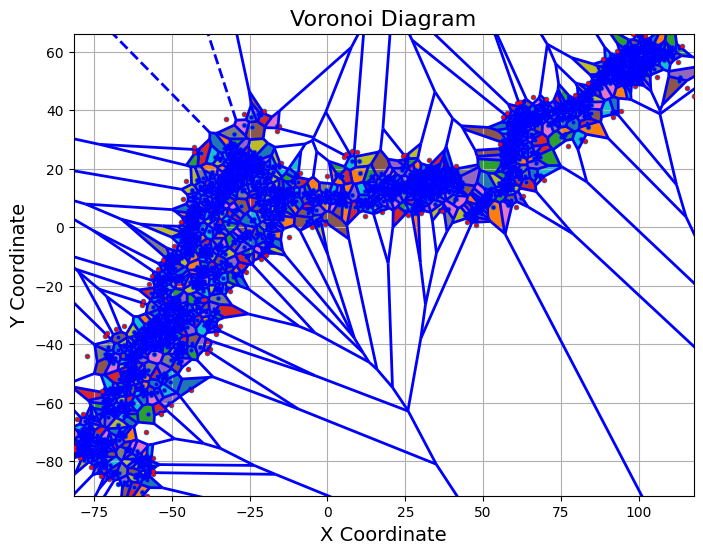

In [65]:
voronoi_plotter.all_voronoi_diagram_area_filtered(x_lim_min=x_min, x_lim_max=x_max, y_lim_min=y_min, y_lim_max=y_max)

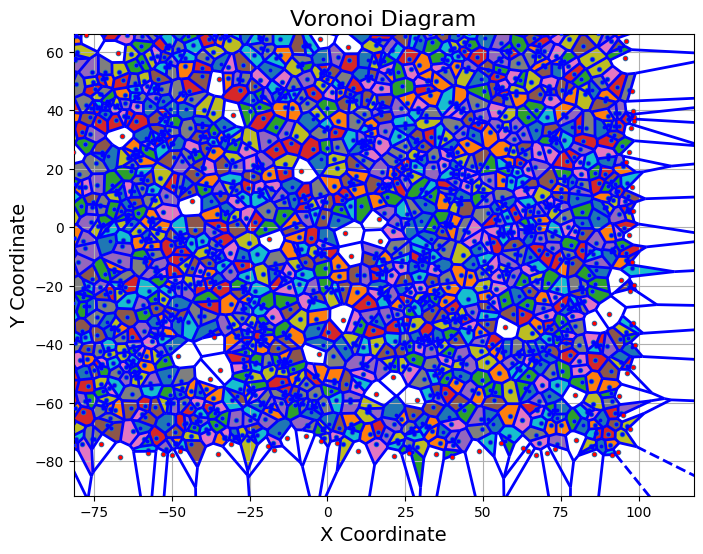

In [66]:
voronoi_plotter_random.all_voronoi_diagram_area_filtered(x_lim_min=x_min, x_lim_max=x_max, y_lim_min=y_min, y_lim_max=y_max)

In [ ]:
dr=0.2
g=voronoi_analyser.mean_radial_distribution(dr)


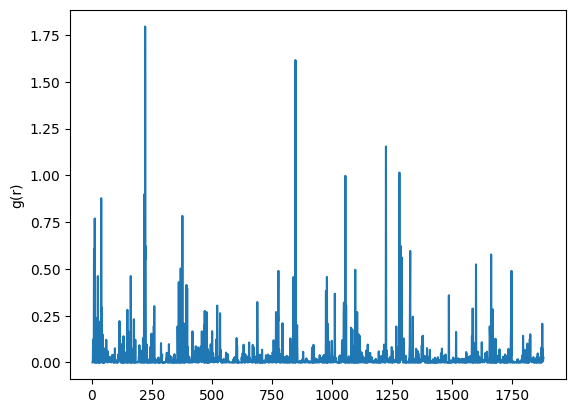

In [159]:
plt.plot(g)
#plt.xlabel('r [m]')
plt.ylabel('g(r)')
plt.show()


C:\Users\marwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\marwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


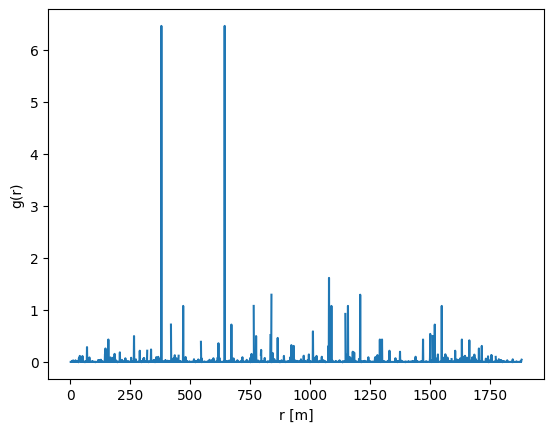

In [134]:
dr=0.5
g_random=voronoi_analyser_random.mean_radial_distribution(dr)
plt.plot(g_random)
plt.xlabel('r [m]')
plt.ylabel('g(r)')
plt.show()

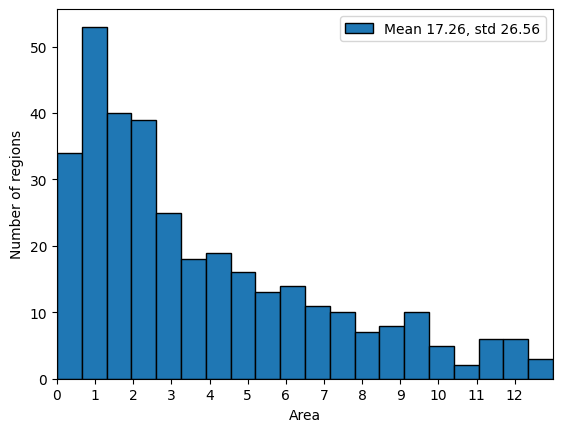

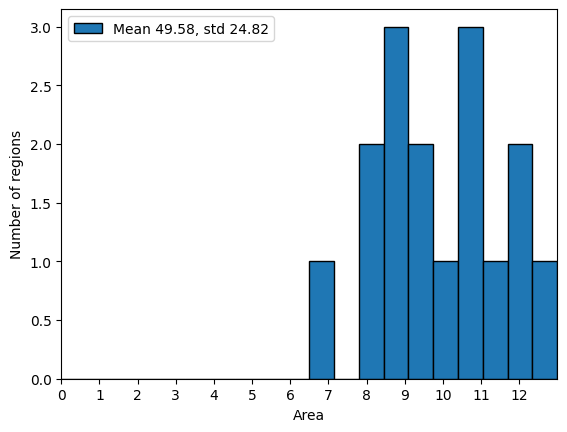

In [8]:
areas = df.loc[df["Point of Voronoi"] == 1, "Area"]
voronoi_plotter.areas_hist(areas)

areas_random = df_random.loc[df_random["Point of Voronoi"] == 1, "Area"]
voronoi_plotter.areas_hist(areas_random)

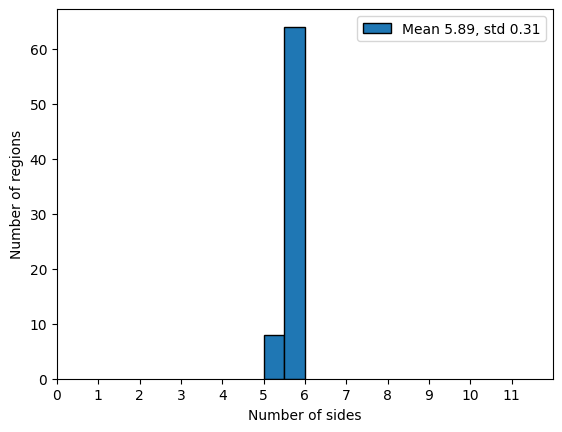

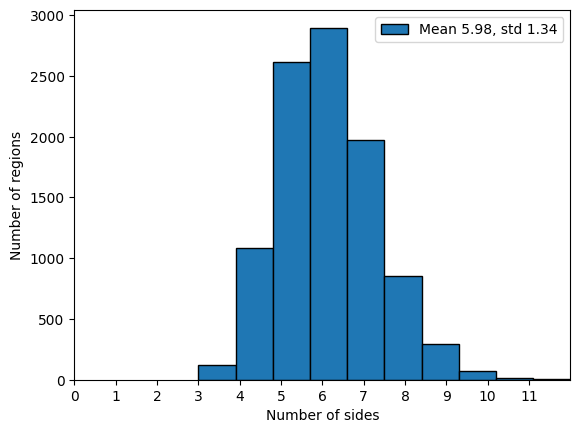

In [7]:
sides=voronoi_analyser.calculate_sides()
voronoi_plotter.sides_number_hist(sides)

sides_random=voronoi_analyser_random.calculate_sides()
voronoi_plotter.sides_number_hist(sides_random)

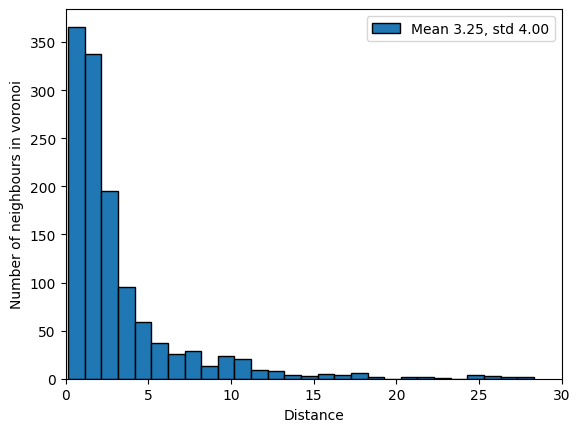

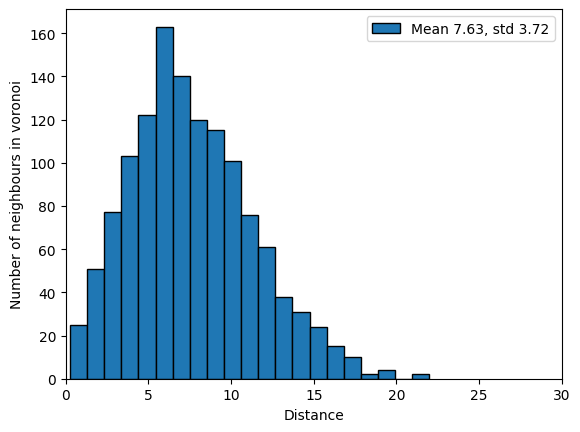

In [10]:
distances=voronoi_analyser.calculate_distance_between_neighbours()
voronoi_plotter.distance_between_neighbours_hist(distances)

distances_random=voronoi_analyser_random.calculate_distance_between_neighbours()
voronoi_plotter.distance_between_neighbours_hist(distances_random)

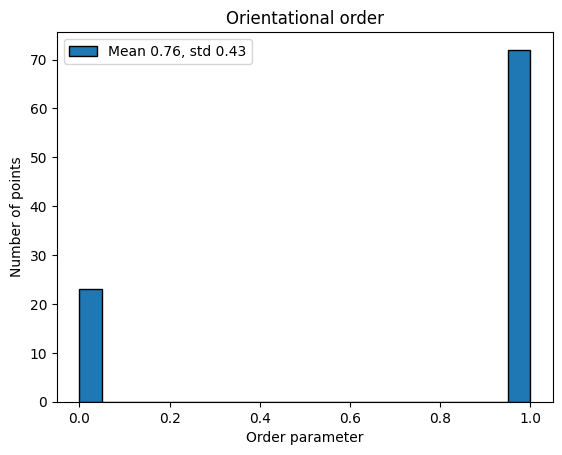

In [10]:
updated_df = voronoi_analyser.calculate_orientational_order(absolute = False)
order=updated_df.loc[df['Point of Voronoi']==1, 'Hexatic order']
voronoi_plotter.order_hist(order)


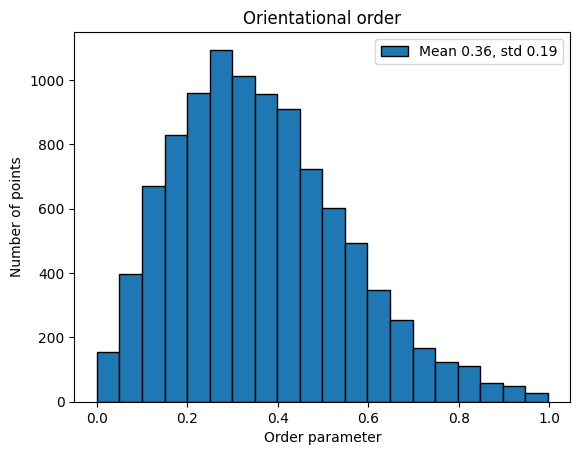

In [8]:
updated_df_random = voronoi_analyser_random.calculate_orientational_order(absolute = False)
order_random=updated_df_random.loc[df_random['Point of Voronoi']==1, 'Hexatic order']
voronoi_plotter.order_hist(order_random)

0.9999999976766296
0.9999999976766296
0.9999999976766296
0.9999999976766296
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638579
0.9999999980638581
0.9999999980638579
0.9999999980638581
0.9999999980638579
0.9999999980638581
0.9999999980638579
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638581
0.9999999980638579
0.9999999980638581
0.9999999980638579
0.9999999980638581
0.9999999980

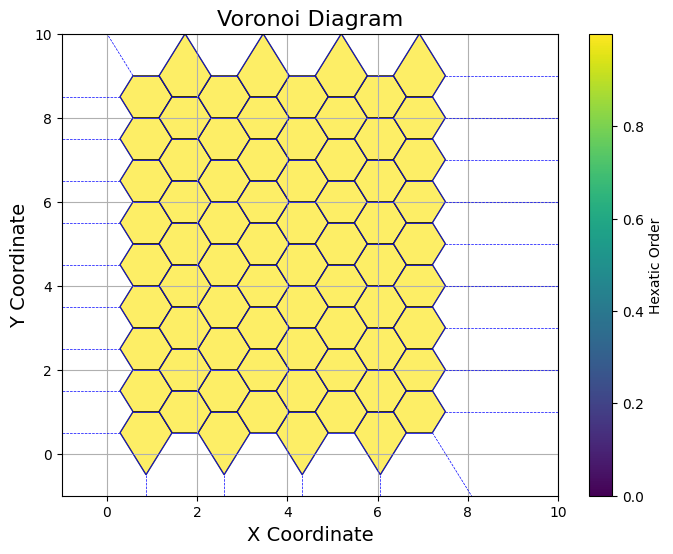

In [11]:
voronoi_plotter.hexatic_order(order, x_lim_min=-1, x_lim_max=10, y_lim_min=-1, y_lim_max=10)

In [12]:
order

1     1.0
2     0.0
3     1.0
4     0.0
5     1.0
     ... 
92    1.0
94    1.0
96    1.0
98    1.0
99    0.0
Name: Hexatic order, Length: 95, dtype: float64

0.2951170396517758
0.410762509520744
0.09769716424333034
0.46451677409052294
0.40119396976742094
0.24523189239591212
0.2735747608994588
0.1479276857652943
0.9573333333333333
0.24301079517734656
0.49637514887529455
0.6479089522771041
0.21926714204887895
0.1560917247650716
0.47265741922685056
0.16531445447684914
0.38909005046723116
0.2961837482680996
0.3183033166883038
0.4400579672631554
0.5146598544949182
0.4773847408250109
0.12354926983583013
0.24539775989528337
0.1873813525182651
0.38194277271767796
0.1251458673195886
0.39611698024650654
0.4581239716181889
0.08918796240360184
0.32205077871219173
0.14645992472535513
0.45391236680780755
0.5310315428115172
0.24878698345004802
0.8011386710371525
0.7170486461632193
0.7301872554252317
0.36483350955049043
0.44323426277190164
0.3320376507484706
0.41435513281301944
0.42689395399944535
0.48391901058876374
0.5906670206014446
0.04142946168234544
0.490668802042778
0.18964003537019172
0.12874859207753295
0.26612259324229537
0.13755108881214817
0.34

KeyboardInterrupt: 

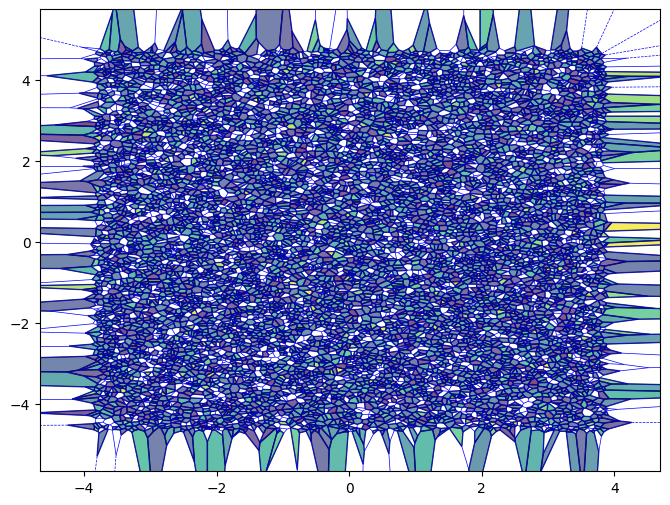

: 

In [ ]:
voronoi_plotter_random.hexatic_order(order_random, x_lim_min=x_min, x_lim_max=x_max, y_lim_min=y_min, y_lim_max=y_max)

In [174]:
r_values = np.linspace(1, 200, 150)  # Distances for K(r)
area = 200 * 200
k_results = voronoi_analyser.calculate_ripleys_k(r_values, area)

(11101,)
(4992, 4992)


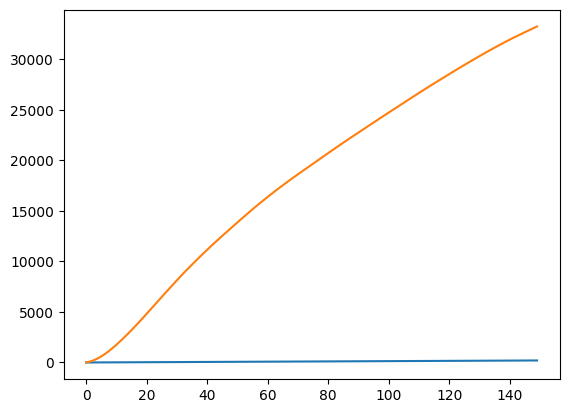

In [171]:
plt.plot(k_results)

In [163]:
k_results

,r,K(r)
0,1.0,2.909885
1,2.0,12.535384
2,3.0,27.354527
3,4.0,46.855975
4,5.0,70.574149
5,6.0,97.777763
6,7.0,128.547090
7,8.0,162.462304
8,9.0,199.088327
9,10.0,238.755080
